# Final Submission: Resolving Problems in Educational Institutions
Name : Mohamad Dimas Amardika

Email : dimasamardika24@gmail.com

Id Dicoding : victor12

## Preparation

### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

### Import Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv", sep=';')

## Data Understanding

In [3]:
df.shape

(4424, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
df.duplicated().sum()

0

In [6]:
df["Status"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [7]:
df["Status"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Status, dtype: int64

## Data Preparation / Preprocessing

In [8]:
# Removed 'Enrolled' value as irrelevant, focus on 'Graduate' and 'Dropout'
df= df[df['Status'].isin(['Dropout', 'Graduate'])]
df["Status"].value_counts()

Graduate    2209
Dropout     1421
Name: Status, dtype: int64

### cek correlation

In [9]:
# Encode 'Status' as numeric values
df_cor = df.copy()
df_cor['Status'] = LabelEncoder().fit_transform(df_cor['Status'])
df_cor['Status'].value_counts()

1    2209
0    1421
Name: Status, dtype: int64

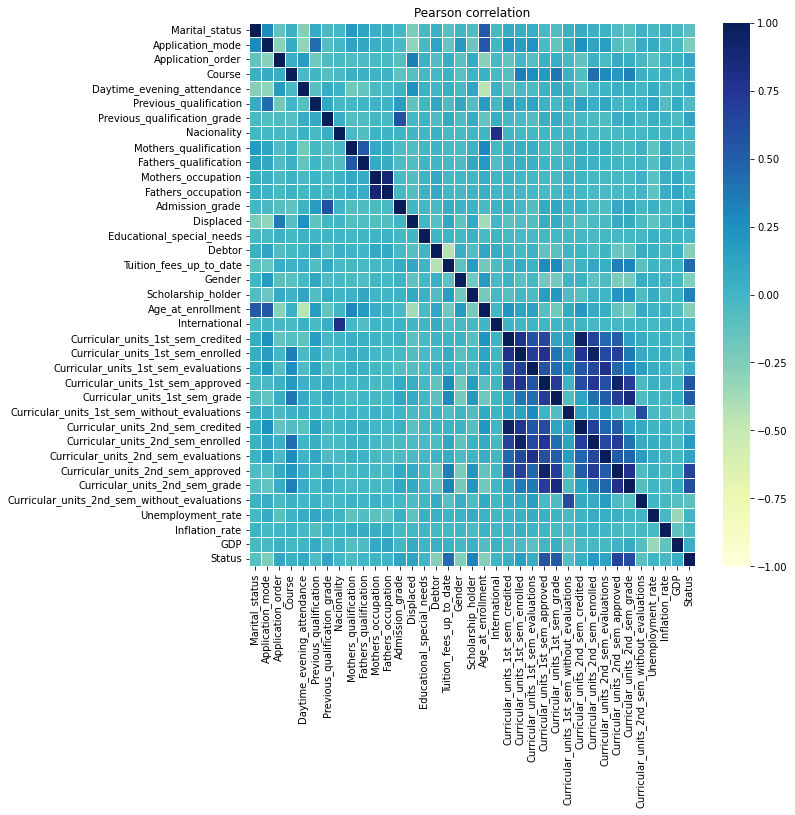

In [10]:
#feature selection
corr_matrix = df_cor.corr(method="pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson correlation")
plt.show()

### Selects relevant features based on correlation results

In [11]:
selected_features = ['Tuition_fees_up_to_date', 'Scholarship_holder',
                     'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
                     'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Status']
df = df[selected_features]

In [12]:
df.describe(include="all")

,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Status
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,0.866116,0.266942,4.791460,10.534860,4.518457,10.036155,NaN
std,0.340575,0.442423,3.237845,5.057694,3.162376,5.481742,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,0.000000,3.000000,11.000000,2.000000,10.517857,NaN
50%,1.000000,0.000000,5.000000,12.341429,5.000000,12.333333,NaN
75%,1.000000,1.000000,6.000000,13.500000,6.000000,13.500000,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tuition_fees_up_to_date            3630 non-null   int64  
 1   Scholarship_holder                 3630 non-null   int64  
 2   Curricular_units_1st_sem_approved  3630 non-null   int64  
 3   Curricular_units_1st_sem_grade     3630 non-null   float64
 4   Curricular_units_2nd_sem_approved  3630 non-null   int64  
 5   Curricular_units_2nd_sem_grade     3630 non-null   float64
 6   Status                             3630 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 226.9+ KB


In [14]:
df.columns

Index(['Tuition_fees_up_to_date', 'Scholarship_holder',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Status'],
      dtype='object')

In [15]:
df.shape

(3630, 7)

## Exploratory Data Analyst

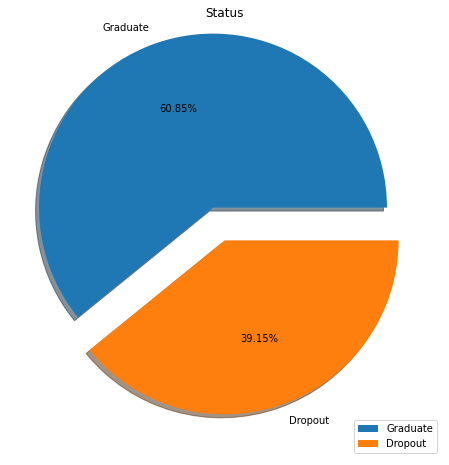

In [16]:
plt.figure(figsize=(8, 8))
plt.title("Status")
status_counts = df['Status'].value_counts()
plt.pie(status_counts, explode=(0.2, 0.0), labels=status_counts.index, autopct='%1.2f%%', shadow=True)
plt.legend(loc='lower right')
plt.show()

Based on the data, 60.85% of the students graduated and 39.15% dropped out, out of a total of 3,630 students.

In [17]:
# # Export CSV
# df.to_csv('/content/csv_output/dashboard_1.csv', index=False)

### Effect of Tuition Fees up to Date on Dropout Rates

In [18]:
tuition_fees_df = df[['Tuition_fees_up_to_date', 'Status']]
tuition_fees_df ['Tuition_fees_up_to_date'] = tuition_fees_df ['Tuition_fees_up_to_date'].replace({1: 'Yes', 0: 'No'})
tuition_fees_df = tuition_fees_df.groupby(['Tuition_fees_up_to_date', 'Status']).agg(Count=('Status', 'count')).reset_index()
tuition_fees_df

C:\Users\USER\AppData\Local\Temp\ipykernel_6572\3362928477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition_fees_df ['Tuition_fees_up_to_date'] = tuition_fees_df ['Tuition_fees_up_to_date'].replace({1: 'Yes', 0: 'No'})


,Tuition_fees_up_to_date,Status,Count
0,No,Dropout,457
1,No,Graduate,29
2,Yes,Dropout,964
3,Yes,Graduate,2180


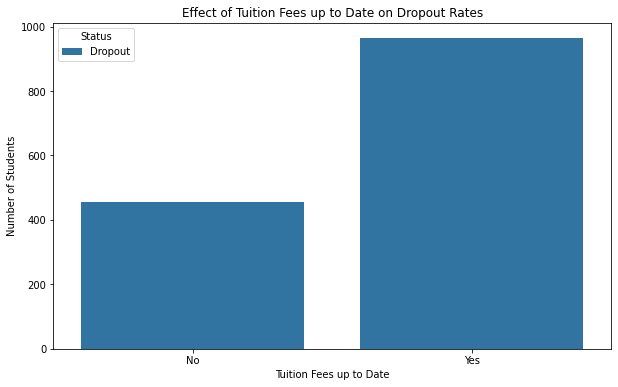

In [19]:
dropout_df = tuition_fees_df[tuition_fees_df['Status'] == 'Dropout']

plt.figure(figsize=(10, 6))
sns.barplot(data=dropout_df, x='Tuition_fees_up_to_date', y='Count', hue='Status')

plt.title('Effect of Tuition Fees up to Date on Dropout Rates')
plt.xlabel('Tuition Fees up to Date')
plt.ylabel('Number of Students')
plt.legend(title='Status')

plt.show()

Based on the analysis of the effect of tuition fees up to date on dropout rates, it is observed that there are significantly fewer cases of student dropout when tuition fees are paid up to date. Specifically:

- Tuition Fees up to Date No: There were 457 cases of student dropout.

- Tuition Fees up to Date Yes: There were 964 cases of student dropout.


In [20]:
# # Export CSV
# dropout_df.to_csv('/content/csv_output/dashboard_2.csv', index=False)

### Effect of Scholarship Holder Status on Dropout Rates

In [21]:
Scholarship_holder_df = df[['Scholarship_holder', 'Status']]
Scholarship_holder_df ['Scholarship_holder'] = Scholarship_holder_df ['Scholarship_holder'].replace({1: 'Yes', 0: 'No'})
Scholarship_holder_df = Scholarship_holder_df.groupby(['Scholarship_holder', 'Status']).agg(Count=('Status', 'count')).reset_index()
Scholarship_holder_df

C:\Users\USER\AppData\Local\Temp\ipykernel_6572\4057991807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Scholarship_holder_df ['Scholarship_holder'] = Scholarship_holder_df ['Scholarship_holder'].replace({1: 'Yes', 0: 'No'})


,Scholarship_holder,Status,Count
0,No,Dropout,1287
1,No,Graduate,1374
2,Yes,Dropout,134
3,Yes,Graduate,835


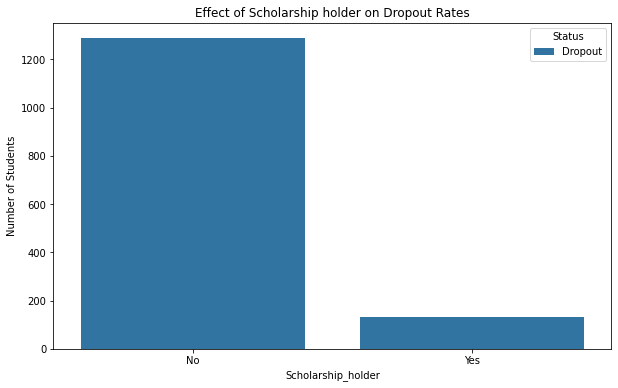

In [22]:
Scholarship_dropout_df = Scholarship_holder_df[Scholarship_holder_df['Status'] == 'Dropout']

plt.figure(figsize=(10, 6))
sns.barplot(data=Scholarship_dropout_df, x='Scholarship_holder', y='Count', hue='Status')

plt.title('Effect of Scholarship holder on Dropout Rates')
plt.xlabel('Scholarship_holder')
plt.ylabel('Number of Students')
plt.legend(title='Status')

plt.show()

**Conclusion:**
The dropout rate among scholarship holders (134) is lower compared to non-scholarship holders (1287). This indicates that receiving a scholarship correlates with a lower likelihood of dropping out.

In [23]:
# # Export CSV
# Scholarship_dropout_df.to_csv('/content/csv_output/dashboard_3.csv', index=False)

### Impact of Grade in 1st Semester Curricular Units on Dropout Rates

In [24]:
Curricular_units_1st_sem_grade_df = df[['Curricular_units_1st_sem_grade', 'Status']]
Curricular_units_1st_sem_grade_df

,Curricular_units_1st_sem_grade,Status
0,0.000000,Dropout
1,14.000000,Graduate
2,0.000000,Dropout
3,13.428571,Graduate
4,12.333333,Graduate
...,...,...
4419,13.600000,Graduate
4420,12.000000,Dropout
4421,14.912500,Dropout
4422,13.800000,Graduate


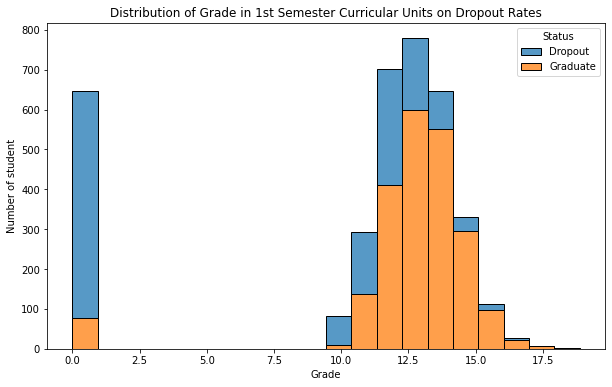

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=Curricular_units_1st_sem_grade_df, x='Curricular_units_1st_sem_grade', hue='Status', multiple='stack', bins=20)
plt.title('Distribution of Grade in 1st Semester Curricular Units on Dropout Rates')
plt.xlabel('Grade')
plt.ylabel('Number of student')
plt.show()

In [26]:
# # Export CSV
# Curricular_units_1st_sem_grade_df.to_csv('/content/csv_output/dashboard_4.csv', index=False)

Based on the analysis, higher grades in the first semester curricular units are associated with a greater likelihood of graduating, while lower grades increase the chances of dropping out.

### Impact of Grade in 2nd Semester Curricular Units on Dropout Students

In [27]:
Curricular_units_2nd_sem_grade_df = df[['Curricular_units_2nd_sem_grade', 'Status']]
Curricular_units_2nd_sem_grade_df.head(5)

,Curricular_units_2nd_sem_grade,Status
0,0.000000,Dropout
1,13.666667,Graduate
2,0.000000,Dropout
3,12.400000,Graduate
4,13.000000,Graduate


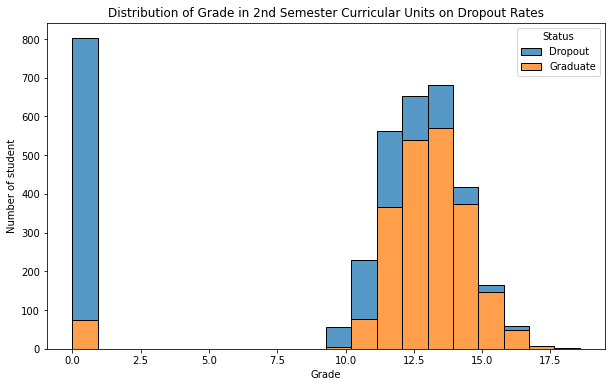

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=Curricular_units_2nd_sem_grade_df, x='Curricular_units_2nd_sem_grade', hue='Status', multiple='stack', bins=20)
plt.title('Distribution of Grade in 2nd Semester Curricular Units on Dropout Rates')
plt.xlabel('Grade')
plt.ylabel('Number of student')
plt.show()


Based on the analysis, the impact of grades in 2nd semester curricular units on dropout students follows a similar pattern to that observed in the 1st semester. Higher grades correlate with a higher likelihood of graduation, whereas lower grades increase the probability of dropout. This emphasizes the consistent importance of academic performance across both semesters in determining whether students graduate or dropout from their studies.

In [29]:
# # Export CSV
# Curricular_units_2nd_sem_grade_df.to_csv('/content/csv_output/dashboard_5.csv', index=False)

In [30]:
# import shutil

# # Replace 'your_folder_path' with the path of the folder you want to download
# folder_path = '/content/csv_output'

# # Zip the folder
# shutil.make_archive(folder_path, 'zip', folder_path)

# # Move the zip file to /content to make it easily downloadable
# shutil.move(f'{folder_path}.zip', '/content/download.zip')

## Modeling Machine Learning

#### Prepare data for machine learning

In [31]:
ml_data = df.copy()

In [32]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tuition_fees_up_to_date            3630 non-null   int64  
 1   Scholarship_holder                 3630 non-null   int64  
 2   Curricular_units_1st_sem_approved  3630 non-null   int64  
 3   Curricular_units_1st_sem_grade     3630 non-null   float64
 4   Curricular_units_2nd_sem_approved  3630 non-null   int64  
 5   Curricular_units_2nd_sem_grade     3630 non-null   float64
 6   Status                             3630 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 226.9+ KB


In [33]:
ml_data["Status"].value_counts()

Graduate    2209
Dropout     1421
Name: Status, dtype: int64

In [34]:
# # Split data
# X = ml_data.drop(['Status'], axis=1)
# y = ml_data['Status'].values

In [35]:
# # Resampling data
# from collections import Counter
# from imblearn.over_sampling import RandomOverSampler
# print(Counter(y))
# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X, y)
# print(Counter(y_over))

### Train-test Split

In [36]:
#from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ml_data, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(2904, 7)
(726, 7)


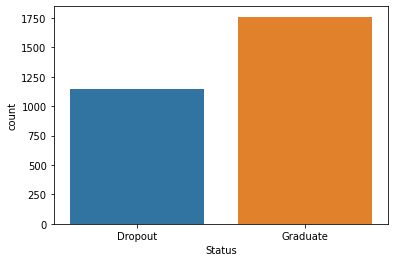

In [37]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [38]:
train_df.Status.value_counts()

Graduate    1760
Dropout     1144
Name: Status, dtype: int64

### Oversampling

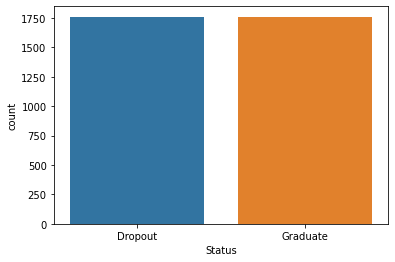

In [39]:
from sklearn.utils import resample
from sklearn.utils import shuffle

df_majority = train_df[(train_df.Status == "Graduate")]
df_minority = train_df[(train_df.Status == 'Dropout')]


df_majority_undersampled = resample(df_majority, n_samples=1760, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=1760, random_state=42)


oversampled_train_df = pd.concat([df_majority_undersampled, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)


sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

### Separating features from targets

In [40]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

### Scaling

In [41]:
if not os.path.exists('model'):
    os.makedirs('model')

def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature]).reshape(-1,1)
            scaler.fit(X)
            df[feature] = scaler.transform(X)
            joblib.dump(scaler, f"model/scaler_{feature}.joblib")

            X_test = np.asanyarray(df_test[feature]).reshape(-1,1)
            df_test[feature] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature]).reshape(-1,1)
            scaler.fit(X)
            df[feature] = scaler.transform(X)
            joblib.dump(scaler, f"model/scaler_{feature}.joblib")
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, f"model/encoder_{feature}.joblib")

            df_test[feature] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, f"model/encoder_{feature}.joblib")
        return df

In [42]:
X_train.columns

Index(['Tuition_fees_up_to_date', 'Scholarship_holder',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade'],
      dtype='object')

In [43]:
numerical_columns = ['Tuition_fees_up_to_date', 'Scholarship_holder',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

In [44]:
new_train_df

,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade
0,1.0,0.0,0.461538,0.675214,0.50,0.732955
1,1.0,0.0,0.269231,0.757937,0.40,0.839360
2,1.0,0.0,0.192308,0.611111,0.25,0.670455
3,1.0,1.0,0.230769,0.703704,0.30,0.738636
4,1.0,0.0,0.115385,0.592593,0.15,0.596591
...,...,...,...,...,...,...
3515,1.0,1.0,0.230769,0.824074,0.30,0.804924
3516,1.0,1.0,0.269231,0.750794,0.35,0.767857
3517,1.0,1.0,0.269231,0.738889,0.40,0.859375
3518,1.0,0.0,0.038462,0.555556,0.10,0.643939


In [45]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

### Modeling

In [46]:
model_lr = LogisticRegression()
model_lr.fit(new_train_df, new_y_train)

LogisticRegression()

In [47]:
joblib.dump(model_lr, "logreg.joblib")

['logreg.joblib']

### Evaluation

In [48]:
def perform(y_pred):
    print("Precision : ", precision_score(new_y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(new_y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(new_y_test, y_pred))
    print("F1 Score : ", f1_score(new_y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(new_y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(new_y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Graduated', 'Dropout'])
    cm.plot()

In [49]:
y_pred_lr = model_lr.predict(new_test_df)

Precision :  0.8801652892561983
Recall :  0.8801652892561983
Accuracy :  0.8801652892561983
F1 Score :  0.8801652892561983

 [[212  65]
 [ 22 427]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       277
           1       0.87      0.95      0.91       449

    accuracy                           0.88       726
   macro avg       0.89      0.86      0.87       726
weighted avg       0.88      0.88      0.88       726

******************************************************



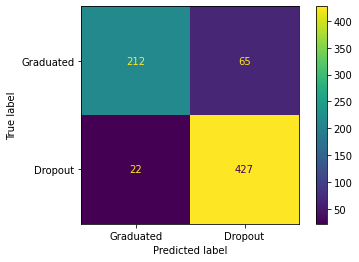

In [50]:
perform(y_pred_lr)

In [52]:
model_lr.predict([[1,1,1,1,1,1]])

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])